# Homework 9 - Enis Becirbegovic

***Dynamic Programming***  

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

In [1]:
import random
import string
from collections import deque
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [14]:
letters = string.ascii_lowercase
r_string =  ''.join(random.choice(letters) for i in range(50)) 
 
def list_of_random_string(size,length ):
    l = []
    i = 1
    while len(l) < size:
        random.seed(i)
        r_string = ''.join(random.choice(letters) for i in range(length))
        if r_string not in l:    
            l.append(r_string)
        i +=1 
    return l

 

# Introduction

For this assignment, we will explore the topic of dynamic programming and how it can be applied to estimate the longest common subsequence (LCS). 

For comparison purposes, we will compare the implementation of LCS algorithm using a dynamic-programming approach and compare this to the execution times by using Recursive/Naive Approach. Most of the code, with some minor changes, is sourced from ***geekforce.org***. 

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

#  Implementation of LCS using Recursive Appraoch

In [ ]:
def lcs(X, Y, m, n): 
  
    if m == 0 or n == 0: 
       return 0; 
    elif X[m-1] == Y[n-1]: 
       return 1 + lcs(X, Y, m-1, n-1)
    else: 
       return max(lcs(X, Y, m, n-1), lcs(X, Y, m-1, n))

str_len = range(1,11)  
times = []
for i in str_len:
    
    strings =  list_of_random_string(2,i)
    X = strings[0]
    Y = strings[1]
    start = time.perf_counter()
    print ("Length of LCS is ", lcs(X , Y, len(X), len(Y)))
    end = time.perf_counter()    
    time_req = end-start
    times.append(time_req)

### Plot Time Compexity of the implementation using Recursive Approach

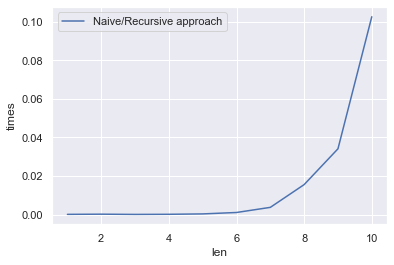

In [159]:
t = pd.DataFrame([str_len,times]).T
t.columns  = ['len','times']
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax2 = plt.twinx()
sns.lineplot(data=t, x="len", y="times",label='Naive/Recursive approach') 
# sns.lineplot(data=results, x="position", y="binary",label='binary')

## Implementation of LCS using Dynamic Programming

In [165]:
# Dynamic Programming implementation of LCS problem 

def lcs(X , Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 

    # declaring the array for storing the dp values 
    L = [[None]*(n+1) for i in range(m+1)] 

    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 

    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 


### Plot Time Compexity of the implementation using Dynamic Programming

Length of LCS is  0
Length of LCS is  0
Length of LCS is  0
Length of LCS is  0
Length of LCS is  1
Length of LCS is  1
Length of LCS is  1
Length of LCS is  1
Length of LCS is  1
Length of LCS is  2


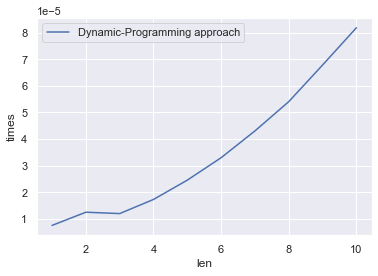

In [174]:
#### Create 1 to 11 random string of equal size and iterate over
str_len = range(1,11) #Create the range 1-10. Each item in range represent the string lentgh to create randomly  
times = []
for i in str_len:
    strings =  list_of_random_string(2,i)
    X = strings[0]
    Y = strings[1]
    print ("Length of LCS is ",lcs(X, Y) )
    results = %timeit -n 100 -o -q lcs(X, Y)    
    time_req = end-start
    times.append(results.average)
    
t = pd.DataFrame([str_len,times]).T
t.columns  = ['len','times']
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(data=t, x="len", y="times",label='Dynamic-Programming approach'); 

# Algorithm code breakdown

#### 1. Starting table

In [155]:
X = ''.join(random.choice(letters) for i in range(4))
Y = ''.join(random.choice(letters) for i in range(10))

x = len(X) 
y = len(Y)
 
L = [[None]*(y+1) for i in range(x+1)] 
L

[[None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None]]

#### Example two string comparison with Substring printing and the final table printed

Source:

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/<br>
https://www.geeksforgeeks.org/printing-longest-common-subsequence/

In [177]:
def lcs_print(X , Y):
    global sequence 
    
    sequence = []
    # find the length of the strings 
    x = len(X) 
    y = len(Y) 

    # declaring the array for storing the dp values 
    L = [[None]*(y+1) for i in range(x+1)] 

    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
   
    for Xi in range(x+1): 
        for Yj in range(y+1): 
            if Xi == 0 or Yj == 0 :               
                L[Xi][Yj] = 0
            elif X[Xi-1] == Y[Yj-1]: 
                L[Xi][Yj] = L[Xi-1][Yj-1]+1
                sequence.append( X[Xi-1])
            else: 
                L[Xi][Yj] = max(L[Xi-1][Yj] , L[Xi][Yj-1]) 
            
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
 

    # Following code is used to print LCS 
    index = L[x][y] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = x 
    j = y 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1
  
    print ("LCS of " + X + " and " + Y + " is " + "".join(lcs))
    return L  

In [178]:
X="BCDAGH"
Y="AEDFHR"
lcs_print(X,Y)

LCS of BCDAGH and AEDFHR is AH


[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 2, 2]]

### Discussion

In this exercise, we used  Dynamic-Programming to solve for ***longest Common Subsequence*** or (LCS). 

##### Algorithm Logic 

Dynamic programming for the Longest Common Subsequence start by creating an empty tabular data structures or Matrix of the size len(X)+1 by len(Y)+1. This is the determined by the following code: 
```python
    x = len(X) 
    y = len(Y)
    L = [[None]*(y+1) for i in range(x+1)] 
```
For example for X string size of 4 and Y string size of 10 our starting matrix looks as follows:
```python
    [[None, None, None, None, None, None, None, None, None, None, None], 
     [None, None, None, None, None, None, None, None, None, None, None], 
     [None, None, None, None, None, None, None, None, None, None, None], 
     [None, None, None, None, None, None, None, None, None, None, None], 
     [None, None, None, None, None, None, None, None, None, None, None]]
```
 
Note that the matrix is 5x11 where one row and column are added for indexing of the array later in the code to prevent errors when indices-1 are called. The following part of Dynamic Programming implementation iterates over this matrix from left to right and by row. This loop is expressed as follows: 
```python
    for Xi in range(x+1): 
        for Yj in range(y+1): 
            pass
```   
    
The algorithm loops left to right one row at the time. The table is filled using the following logic:   
```python
            if Xi == 0 or Yj == 0 :               
                    L[Xi][Yj] = 0
            elif X[Xi-1] == Y[Yj-1]: 
                L[Xi][Yj] = L[Xi-1][Yj-1]+1
            else: 
                L[Xi][Yj] = max(L[Xi-1][Yj] , L[Xi][Yj-1])
``` 
The first part of the if statement fills zero for the first row and first columns(indices at 0). The first row and columns are placeholders.

The second part of the if statement checks whether the 2nd string letter (Yj) matches the 1st string letter (Xj). If this is true then 1 is added to the value indexed at [Xi-1,Yi-1]. For example:

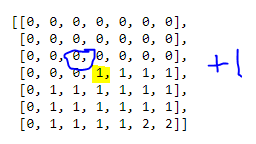


In this Matrix, the yellow value is determined by 0 (circled in blue) + 1. 

If this is not true, then the logic falls through to the else statement where the value of L[Xi][Yi] is determined by the max statement of the value to the left and to the top of the current cell. For example:

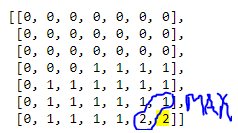

In this instance, the last cell in the table (yellow) is determined by the max(2,1). This is true for all other cells unless there is a match of the letters.

finally, the last statement returns the bottom left number in this table which represents the length of the longest common subsequence. 
```python
    return L[m][n]
```

##### Why is this dynamic programming problem?


The problem is solved using the tabular grid. Each cell in the problem represents a solution to a subproblem. In other words, we compare the cell by cell by row. This allows to broke big problem into a bunch of smaller ones. Finally, we are trying to optimize each cell in our iterations. All these are the characteristics of dynamic programming.


## Time complexity

***Naive/Recursive Approach***

The naïve approach recursively iterates of every possibly substring until it finds the longest sequence. This approach has time complexity or Big O of O(2^n) which is basically the exponential function.  The graph above shows the time complexity for the naive or recursive approach:

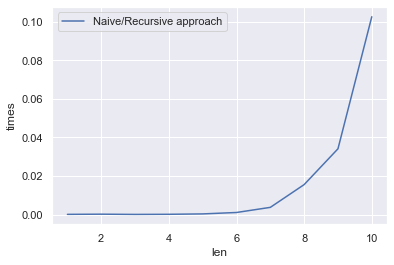



***Dynamic-programming***

With dynamic programming we achieve quasi-quadratic time complexity of O(N*M). N and M represent the length of the string that we are trying to compare. N and M do not have to be equal, but when they are equal then time complexity becomes O(n^2) which basically indicate the quadratic form. This is significaly faster then the naïve approach:

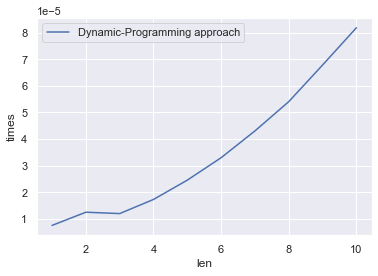

# Executive Summary

dynamic-programming approach. We have shown that the DP approach to the problem is significantly faster than a Naive/Recursive approach. The big of O for DP implementation is O(N x M) where N and M are the lengths the string passed to the algorithms. This is significantly faster than the Naive approach that iterates over all possible combinations with big O of O(2^n). The discussion and graphs above illustrate these points.

Dynamic-programming is a very powerful algorithm in solving certain problems where we do not have a specific algorithm for that purpose. However, DP cannot be used to solve any problem. For one we need to optimize for discrete quantities. For example, we cannot optimize fractional items. The second scenario where Dynamic-Programming will also not work when the subproblems that we are trying to solve are dependent on each other. The travel problem in Chapter 10 highlights this issue. 